# DSA Assignment 1

***Q. 1.***

For each of the following recurrences, first check if master theorem is applicable, and 
if yes, calculate the complexity using it.
1. T(n) = 2T (n /2) + n log n 
2. T(n) = 0.3T(n /2) + 1/n 
3. T(n) = 2T (n /2) + n3
4. T(n) = 7nT (n /2) + n4
5. T(n) = 4T (n /2) + n2√n 
6. T(n) = 64T (n /8) − n2logn 
7. T(n) = 16T (n /4) + n2


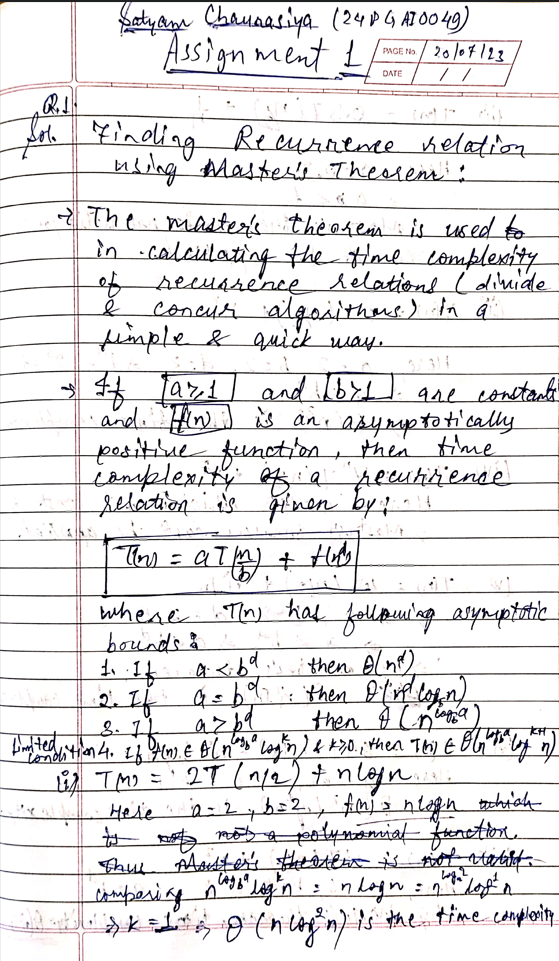

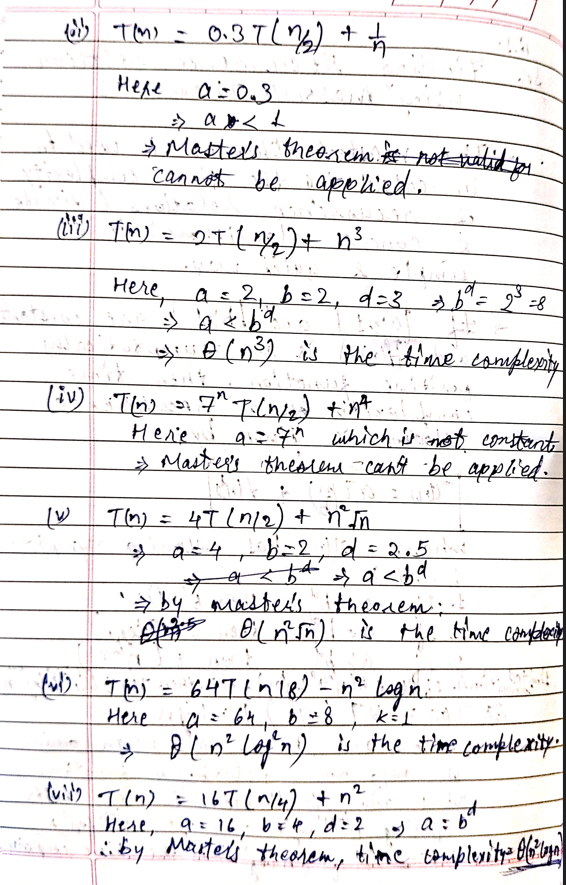

***

***Q. 2.***

Suppose you are choosing between the following three algorithms:

1. Algorithm A solves problems by dividing them into five subproblems of half the 
size, recursively solving each subproblem, and then combining the solutions in 
linear time.
2. Algorithm B solves problems of size n by recursively solving two subproblems 
of size n - 1 and then combining the solutions in constant time.
3. Algorithm C solves problems of size n by dividing them into nine subproblems 
of size n/3, recursively solving each subproblem, and then combining the 
solutions in O(n^2) time.

What are the running times of each of these algorithms (in big-O notation), and which 
would you choose?


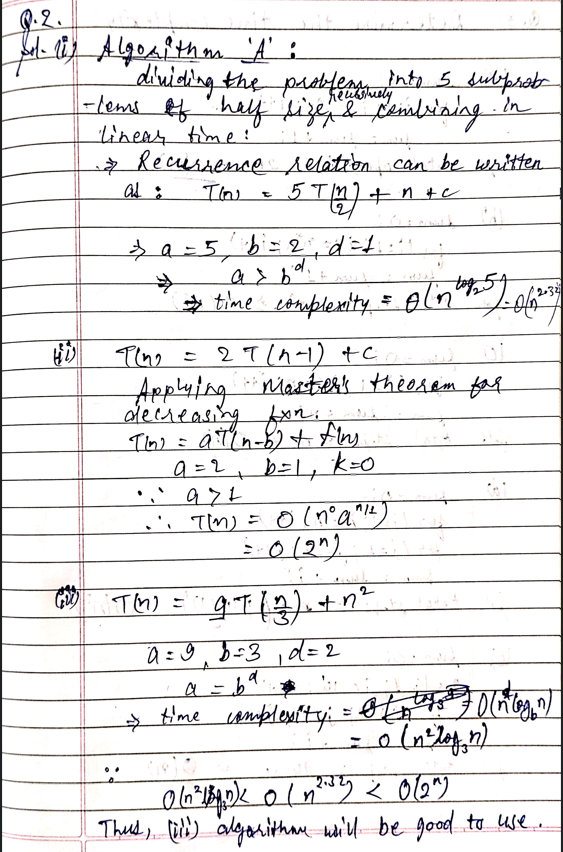

***

***Q. 3.***

Determine the time complexity of the following code segments. In each case, justify 
your answer.
```
(a) sum = 0;                        (b) sum = 0;                        (c) sum=0; 
    for(i=1; i<=2*n; i++)               for(i=1; i<=n*n; i++)               for(i=1; i<=n; i++) 
        sum = sum + 1;                      sum = sum + 1;                      sum = sum + n; 

(d) sum = 0;                        (e) sum = 0;                        (f) sum = 0; 
    for(i=1; i<=n i++)                  for(i=1; i<=100; i++)               for(i=1; i<=n; i++) 
        for(j=1; j<=i; j++)                 for(j=1; j<=n; j++)                 for(j=1; j<=n; j*=2)
            sum = sum + i;                      sum = sum + i;                      sum = sum + 1;
```

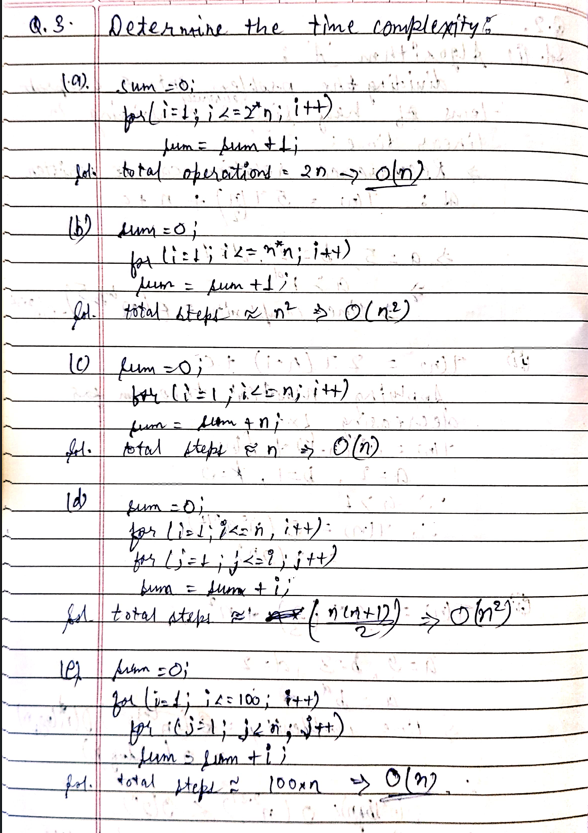

***

***Q. 4.***

Solve the following recurrence relation: f(n) = 2 f(n/2) + n, with f(1) = 1. <br>
To simplify the problem, you may assume that n is a power of 2 (that is, the relation holds for n = 2k for some k ∈ Z +).
```
Hint: Try expanding the expression f(n/2), for which the relation also holds, and then repeatedly for the new sub-expressions:
    f(n/2) = 2 f((n/2)/2) + (n/2) 
    ⇒ f(n) = 2 (2 f(n/4) + n/2) + n 
            = 4 f(n/4) + 2n 
            = 4 (2 f(n/8) + n/4) + 2n 
            = · · ·
```

You can also solve in some alternate method.

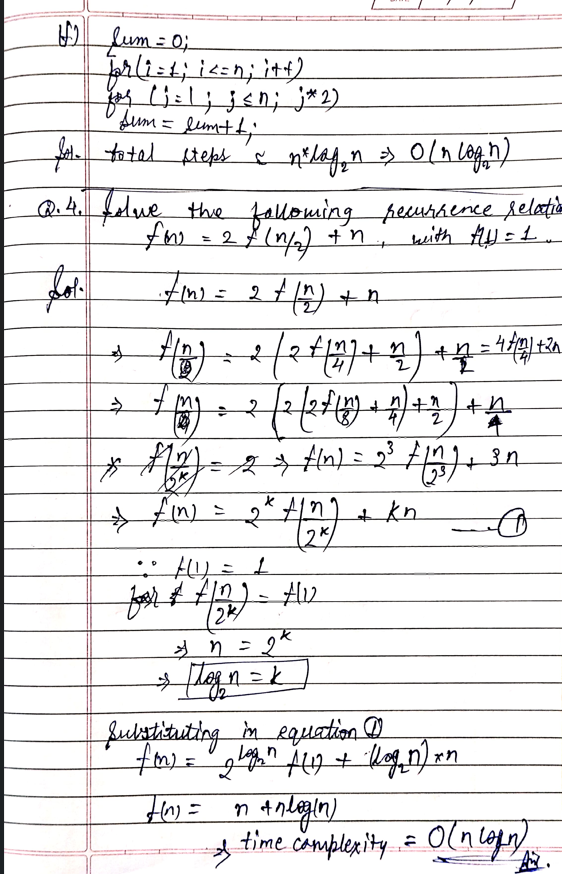

***

Q.5.

Suppose there are seven cars parked in a parking area. A token number is given to 
the owner of each car, and the same number is stamped on the car by the parking 
caretaker. The parked cars have the following sequence of numbers 1,2,3,4,5,6,7 and 
are parked in the same order as previously mentioned.
The caretaker reverses the order of a portion of the sequence of cars and arranges 
the vehicles in order 1,5,4,3,2,6,7. Write an efficient algorithm to find the order of cars 
after placing a portion of cars in the reverse order using a linked list. write and explain 
complete algorithms of it. Is it computationally expansive?

Ans.5. To reverse a portion of a linked list, we can use the following algorithm:

 1. Traverse the linked list until we reach the mth node.
 2. Store the address of the m-1th node and mth node.
 3. Reverse the linked list from mth node to nth node.
 4. Connect the reversed linked list to the m-1th node and nth node.

In [16]:
# A Linked List Node
class Node:
    def __init__(self, data=None, next=None):
        self.data = data
        self.next = next

In [17]:
 
# Utility function to print a linked list
def printList(msg, head):
    print(msg, end=': ')
    ptr = head
    while ptr:
        print(ptr.data, end=' —> ')
        ptr = ptr.next
    print('None')

In [20]:
# Iteratively reverse a linked list from position `m` to `n`
def reverse(head, m, n):
 
    # base case
    if m > n:
        return head
 
    prev = None
    curr = head
 
    # 1. Skip the first `m` nodes
    i = 1
    while curr is not None and i < m:
        prev = curr
        curr = curr.next
        i = i + 1
 
    # `prev` now points to (m-1)'th node
    # `curr` now points to m'th node
 
    start = curr
    end = None

    # 2. Traverse and reverse the sublist from position `m` to `n`
    while curr is not None and i <= n:
 
        # Take note of the next node
        next = curr.next
 
        # move the current node onto the `end`
        curr.next = end
        end = curr
 
        # move to the next node
        curr = next
        i = i + 1
 
    '''
        `start` points to the m'th node
        `end` now points to the n'th node
        `curr` now points to the (n+1)'th node
    '''
 
    # 3. Fix the pointers and return the head node
    if start:
        start.next = curr
        if prev is None:        # when m = 1, `prev` is None
            head = end
        else:
            prev.next = end
 
    return head


In [21]:
 if __name__ == '__main__':
 
    head = None
    for i in reversed(range(7)):
        head = Node(i + 1, head)
 
    (m, n) = (2, 5)
 
    printList('Original linked list:', head)
    head = reverse(head, m, n)
    printList('Reversed linked list', head)

Original linked list:: 1 —> 2 —> 3 —> 4 —> 5 —> 6 —> 7 —> None
Reversed linked list: 1 —> 5 —> 4 —> 3 —> 2 —> 6 —> 7 —> None


This algorithm has a **time complexity of O(n)** and ***space complexity of O(1)***, where n is the number of nodes in the linked list. Therefore, it is computationally efficient.

***

Q.6.

Suppose you have sets S1 and S2 represented as linked-lists, and access to the standard primitive list operators first, rest and isEmpty. Rest means the remaining item(s). Write a recursive procedure member(x,S1) that returns true if item x is in set S1, and false if it is not. 
Provide an argument that leads to the average-case and worst-case time complexities of your member(x,S1) algorithm in Big O notation.

Ans. 6.

The recursive procedure member(x,S1) that returns true if item x is in set S1, and false if it is not can be implemented as follows:

>(define (member x S1)<br>
  >> (cond ((null? S1) #f)<br>
       >>> ((equal? x (car S1)) #t)<br>
       >> (else (member x (cdr S1)))))<br>

The average-case and worst-case time complexities of this member(x,S1) algorithm in Big O notation are both `O(n)` where n is the number of items in set S1 including x. If set S1 contains n items including x, the recursive member(x,S1) procedure will on average need to check n/2 items, and in the worst case check all n items, before returning true. If S1 does not include x, the procedure will have to check all n items before returning false

In [29]:
def member(x, S1):
    if not S1:
        return False
    elif x == S1[0]:
        return True
    else:
        return member(x, S1[1:])

In [32]:
set1 = {1000, 500, 30, 260}
print(member(30, list(set1)))
print(member(10, list(set1)))
print(member(1000, list(set1)))

True
False
True


***

Q. 7.

The following segment of pseudo code will sort an array a of finite size n: 
```
for( i = 1 ; i != n ; i++ ) { 
    j = i; 
    t = a[j]; 
    while( j > 0 && t < a[j-1] ) 
        a[j] = a[--j]; a[j] = t; 
} 
```
Which sorting algorithm discussed is this an implementation of?

Work through the sorting of the array [6, 4, 8, 5, 2, 7] using this algorithm, writing down 
the values of i, j, t and the array a at the end of each iteration of the for loop.

Ans. 7. Here is the python implementation of the above code:

In [47]:
def insertion_sort(a):
    for i in range(1, len(a)):
        j = i
        t = a[j]
        print('t:',t, '\ni:', i)
        while j > 0 and t < a[j-1]:
            a[j] = a[j-1]
            j -= 1
            print('j:', j)
        a[j] = t
        print('array:', a, '\n')

The pseudo code provided is an implementation of **Insertion Sort** algorithm. It is a simple sorting algorithm that works the way we sort playing cards in our hands. It sorts the array by shifting elements one by one and inserting the current element at its correct position.

In [48]:
a = [6, 4, 8, 5, 2, 7]
insertion_sort(a)
print('sorted array:', a)

t: 4 
i: 1
j: 0
array: [4, 6, 8, 5, 2, 7] 

t: 8 
i: 2
array: [4, 6, 8, 5, 2, 7] 

t: 5 
i: 3
j: 2
j: 1
array: [4, 5, 6, 8, 2, 7] 

t: 2 
i: 4
j: 3
j: 2
j: 1
j: 0
array: [2, 4, 5, 6, 8, 7] 

t: 7 
i: 5
j: 4
array: [2, 4, 5, 6, 7, 8] 

sorted array: [2, 4, 5, 6, 7, 8]


***

**Q. 8.** 
```
 A. Explain the general Quicksort procedure for sorting an array [no more than 100 words].

 B. Sort the array [3, 7, 2, 4, 9, 6, 8, 7, 5, 1, 6] using Quicksort with the pivot chosen to be the middle (rounded down) element of the array at each stage, and a partitioning algorithm that leads to a stable sort. Say how your partitioning algorithm works, and show the pivots and state of the array at each stage, i.e. the ordering and partitioning for each recursive call.
```

***Ans. 8. A.***

The general procedure for **Quicksort** algorithm is as follows:

1. Pick an element, called **pivot**, from the array.
2. Partition the array around the pivot, such that elements smaller than pivot are on the left and elements larger than pivot are on the right.
3. Recursively apply step 1 and 2 to the left and right sub-arrays until the sub-arrays have only one element or no element at all.

This algorithm is called **Quicksort** because it is faster than many other sorting algorithms in practice.

***Ans. 8. B.***

In [51]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr

    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    print(arr, '# Pivot:', pivot)

    return quicksort(left) + middle + quicksort(right)

Here is the sorted array using Quicksort with the pivot chosen to be the middle (rounded down) element of the array at each stage:

In [53]:
arr = [3, 7, 2, 4, 9, 6, 8, 7, 5, 1, 6]
print('\nSorted Array:', quicksort(arr))

[3, 7, 2, 4, 9, 6, 8, 7, 5, 1, 6] # Pivot: 6
[3, 2, 4, 5, 1] # Pivot: 4
[3, 2, 1] # Pivot: 2
[7, 9, 8, 7] # Pivot: 8
[7, 7] # Pivot: 7

Sorted Array: [1, 2, 3, 4, 5, 6, 6, 7, 7, 8, 9]


The partitioning algorithm used is as follows:

1. Choose the middle element of the array as the pivot.
2. Partition the array around the pivot such that elements smaller than pivot are on the left and elements larger than pivot are on the right.
3. If there are two or more elements on either side of the pivot, repeat step 1 and 2 recursively.

***

**Q. 9.**
```
A. How do you find duplicate numbers in an array if it contains multiple duplicates? 
B. What are limitations of linear queue using array? How do you solve it? 
C. How do you implement Stack using Queue? write the algorithms and calculate the time complexity of it.
```

***Ans. 9. A.***

Here is one way to find duplicate numbers in an array using Python:

In [55]:
def find_duplicates(arr):
    duplicates = []
    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if arr[i] == arr[j] and arr[i] not in duplicates:
                duplicates.append(arr[i])
    return duplicates

In [56]:
arr = [3, 7, 2, 4, 9, 6, 8, 7, 5, 1, 6]
print(find_duplicates(arr))

[7, 6]


This implementation uses nested loops to compare each element of the array with every other element. If two elements are equal and the first element is not already in the list of duplicates, it is added to the list.

***Ans. 9. B.***

The limitations of linear queue using array are:

1. The size of the queue is fixed and cannot be changed dynamically.
2. If the rear pointer reaches the end of the array, then there might be some vacant spaces left in the beginning which cannot be utilized.
3. If the queue has a large number of enqueue and dequeue operations, at some point we may not be able to insert elements in the queue even if the queue is empty.

To overcome these limitations, we can use a circular queue. In a circular queue, the last element is connected to the first element. This way, if there is an empty space i.e. if no element is present at a certain position in the queue, then an element can be easily added at that position.

***Ans. 9. C.***

Here are the steps of the algorithm:

1. Create two empty queues q1 and q2.
2. Push the element to be inserted into q1.
3. To pop an element from the stack, move all elements except the last one from q1 to q2.
4. Remove the last element from q1 and return it.
5. Swap the names of q1 and q2.

The push operation is straightforward and simply involves adding an element to q1. The pop operation is more complex and involves moving all elements except the last one from q1 to q2, removing the last element from q1, and swapping the names of q1 and q2.

Here is how you can implement Stack using Queue:

In [57]:
class Stack:
    def __init__(self):
        self.q1 = []
        self.q2 = []

    def push(self, x):
        self.q1.append(x)

    def pop(self):
        if not self.q1:
            return None

        while len(self.q1) > 1:
            self.q2.append(self.q1.pop(0))

        result = self.q1.pop(0)

        while self.q2:
            self.q1.append(self.q2.pop(0))

        return result

    def top(self):
        if not self.q1:
            return None

        while len(self.q1) > 1:
            self.q2.append(self.q1.pop(0))

        result = self.q1[0]

        while self.q2:
            self.q1.append(self.q2.pop(0))

        return result

    def size(self):
        return len(self.q1)

In [66]:
nums_lst = [5, 2, 8, 6, 7, 3]
nums_stack = Stack()

for num in nums_lst:
    nums_stack.push(num)
    print(nums_stack.q1)

print()

for i in range(nums_stack.size()):
    print(nums_stack.pop())
    print(nums_stack.q1, '\n')


[5]
[5, 2]
[5, 2, 8]
[5, 2, 8, 6]
[5, 2, 8, 6, 7]
[5, 2, 8, 6, 7, 3]

3
[5, 2, 8, 6, 7] 

7
[5, 2, 8, 6] 

6
[5, 2, 8] 

8
[5, 2] 

2
[5] 

5
[] 



In [68]:
nums_lst = [5, 2, 8, 6, 7, 3]
nums_stack = Stack()

for num in nums_lst:
    nums_stack.push(num)
    print(nums_stack.top())

5
2
8
6
7
3


The time complexity of push operation is O(1), the time complexity of pop and top operations is O(n) in the worst case because we need to move all elements from one queue to another.

***

***Q. 10.***
```
A. How to find the middle element of the linked list in one pass? 
B. Why do a Tail Recursion? Can a non-tail-recursive function be written as tail recursive to optimize it?
```

***Ans. 10. A***

Here is how you can find the middle element of a linked list in one pass:

1. Initialize two pointers, slow_ptr and fast_ptr, to the head of the linked list.
2. Move the slow_ptr one node at a time and the fast_ptr two nodes at a time.
3. When the fast_ptr reaches the end of the linked list, the slow_ptr will be pointing to the middle element.

Here is an implementation of this algorithm in Python:

In [70]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def push(self, new_data):
        new_node = Node(new_data)
        new_node.next = self.head
        self.head = new_node

    def printMiddle(self):
        slow_ptr = self.head
        fast_ptr = self.head

        if self.head is not None:
            while (fast_ptr is not None and fast_ptr.next is not None):
                fast_ptr = fast_ptr.next.next
                slow_ptr = slow_ptr.next

            print("The middle element is", slow_ptr.data)

In [75]:
llist = LinkedList()
llist.push(6)
llist.push(5)
llist.push(4)
llist.push(3)
llist.push(2)
llist.push(1)
llist.printMiddle()

The middle element is 4


***Ans. 10. B***

Tail recursion is a special case of recursion where the last operation of a function is a recursive call. In tail recursion, the recursive call is the last operation performed in the function. This means that there is no need to keep track of the previous state of the function on the stack. Tail recursion can be optimized by compilers to use less stack space and execute faster than non-tail-recursive functions. 

A non-tail-recursive function can be written as tail-recursive by using an accumulator variable to store intermediate results.

Here is an example of a tail-recursive function in Python:

In [76]:
def factorial(n, acc=1):
    if n == 0:
        return acc
    else:
        return factorial(n-1, n*acc)

print(factorial(5))

120


This implementation of the factorial function uses an accumulator variable to store intermediate results. The function is tail-recursive because the recursive call is the last operation performed in the function .

***
***